# SYRIATEL CUSTOMER CHURN
### By ***Henry Mativo Wamunyu***
### A Moringa School Phase 3 project.

Please fill out:
* Student name: Henry Mativo
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Company Overview 

Established in January 2000, SyriaTel has emerged as the premier telecommunications company in the region. With its headquarters situated in Damascus, Syria, the company has garnered a strong reputation for providing reliable and innovative communication services. SyriaTel has continuously demonstrated its commitment to delivering cutting-edge technology and seamless connectivity to its vast customer base.

## 1.0 BUSINESS UNDERSTANDING

In the business sector, accurately predicting and analyzing customer behavior patterns is a significant challenge. Various factors, including psychological, personal, social, and cultural aspects, influence consumer behavior such as motivation, perception, learning, beliefs, attitudes, age, occupation, lifestyle, and cultural background. Understanding these factors is crucial for businesses to effectively cater to customer needs and preferences.

With the advent of advanced technologies and the ability to handle large volumes of unstructured data, machine learning, in conjunction with Big Data tools, has become instrumental in managing rapidly expanding datasets. Consumer behavior analysis holds great importance in the commercial sector, and machine learning algorithms can be leveraged to build classifiers that predict whether a customer will soon discontinue their business relationship with a company like SyriaTel, a telecommunications company.

This predictive capability provides valuable insights to SyriaTel, enabling them to identify variables that customers appreciate and those that are less favorable. By bridging these gaps, SyriaTel can enhance their customer retention strategies and improve their ability to retain clients effectively.

As a data scientist, I have been hired to develop a robust model that can effectively predict which customers are likely to discontinue their services with SyriaTel.

### 1.1 Business Objectives 
1. **Accurately Predict Customer Churn:** The primary objective is to develop a robust model that can accurately predict which customers are likely to discontinue their services with SyriaTel. By utilizing machine learning algorithms and analyzing relevant data, the model should provide reliable predictions regarding customer churn.

2. **Understand Customer Behavior Patterns:** The objective is to gain a deep understanding of customer behavior patterns by considering various factors such as psychological, personal, social, and cultural aspects. This understanding will help in identifying the key drivers of customer churn and uncovering the variables that impact customer satisfaction and loyalty.

3. **Enhance Customer Retention Strategies:** By leveraging the predictive model's insights, SyriaTel aims to enhance its customer retention strategies. The objective is to identify the variables and factors that contribute to customer attrition, enabling SyriaTel to take proactive measures to retain customers and improve overall customer satisfaction.

4. **Optimize Business Decision-Making:** The predictive model's outcomes will provide valuable insights to SyriaTel's decision-making processes. The objective is to utilize the predictions and analysis to make data-driven business decisions, allocate resources effectively, and implement targeted marketing campaigns to retain customers and maximize profitability.

5. **Improve Overall Customer Experience:** Ultimately, the objective is to leverage the predictive model's insights to enhance the overall customer experience. By understanding customer preferences and addressing their needs, SyriaTel aims to provide better services, tailored offerings, and improved customer support, leading to higher customer satisfaction and loyalty.

## 2.0 DATA UNDERSTANDING

SyriaTel has provided me with that includes information about their customers. The dataset contains information of 33,333 of SyriaTel customers and the features are as follows:

* `state` - Client's residence.
* `account length` - How long they have had the subscription.
* `area code` - Client's area code.
* `phone number` - Client's phone number.
* `international plan` - Is the client subscribed to the international plan?(yes/no).
* `voice mail plan` - Is the client subscribed to the voice mail plan?(yes/no).
* `number vmail messages` - The number of the voicemail messages.
* `total day minutes, calls, charge` - the client's daily minutes, calls, and charges.
* `total eve minutes, calls, charge` - the client's evening minutes, calls, and charges.
* `total night minutes, calls, charge` -the client's night minutes, calls, and charges.
* `total intl minutes, calls, charge` - the client's tital international minutes, calls, and charges.
* `customer service calls` - how many times the customer service line was called.
* `churn` - The response variable we will be targeting.

The purpose of this exercise is to analyze and comprehend the information contained within the columns of the provided CSV file. Our aim is to carefully examine the data, identify patterns and correlations between the variables, and extract meaningful insights from it.

#### Importing the libraries

In [1]:
#Loading the necessary packages for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score

#resample the data
from imblearn.over_sampling import SMOTE,SMOTENC

# For data preprocessing
from sklearn.preprocessing import OneHotEncoder

# For training
from sklearn.model_selection import train_test_split

#The ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,precision_score, recall_score,accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# For metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import f1_score,precision_score,recall_score,plot_roc_curve

# Model selection
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV


# import warnings
# warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')


### Loading the data

In [2]:
df = pd.read_csv("SyriaTel_data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## 2.1 DATA CLEANING
In order to have a good model, I will need to apply data cleaning technique.

The techniques to be used are:
1. Completeness
2. Consistency
3. Validity
4. Collinearity
5. Outlier removal



#### 1. Completeness

To achieve completeness in our data, I will be checking for missing values in the data.

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

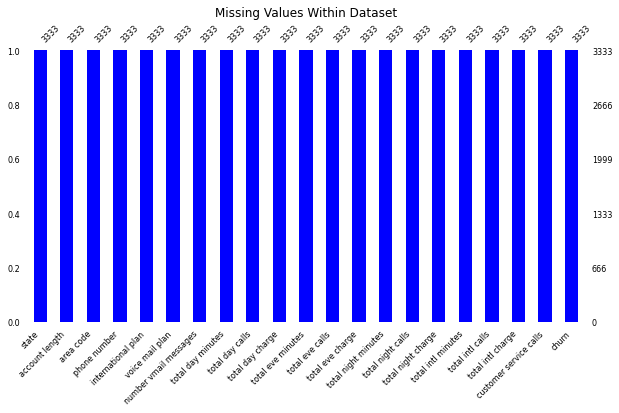

In [6]:
# Visualise the missing values in the dataset
msno.bar(df, color='blue', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

# checking for missing values in the data
df.isnull().sum()

There are no missing values in our dataset

#### 2. Consistency

For the data to be constistent, I need to resolve any inconsistencies by checking for duplicate values in our data.



In [7]:
# cheking for dublicates in the data
df.duplicated().sum()

0

There are no duplicate values in our dataset.

#### 3. Validity

For our data to be valid, I have to verify that every column is accurate and appropriate for this analysis and remove those that are invalid.

In [8]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


I will remove the column 'phone number' from the dataset because most digit in the phone number is random, and we will not use for modeling.

In [9]:
df = df.drop("phone number", axis=1)

#### 4. Collinearity

Collinearity can impact the model's interpretability and stability. Thus I need to address collinearity by detecting and mitigating their issues.

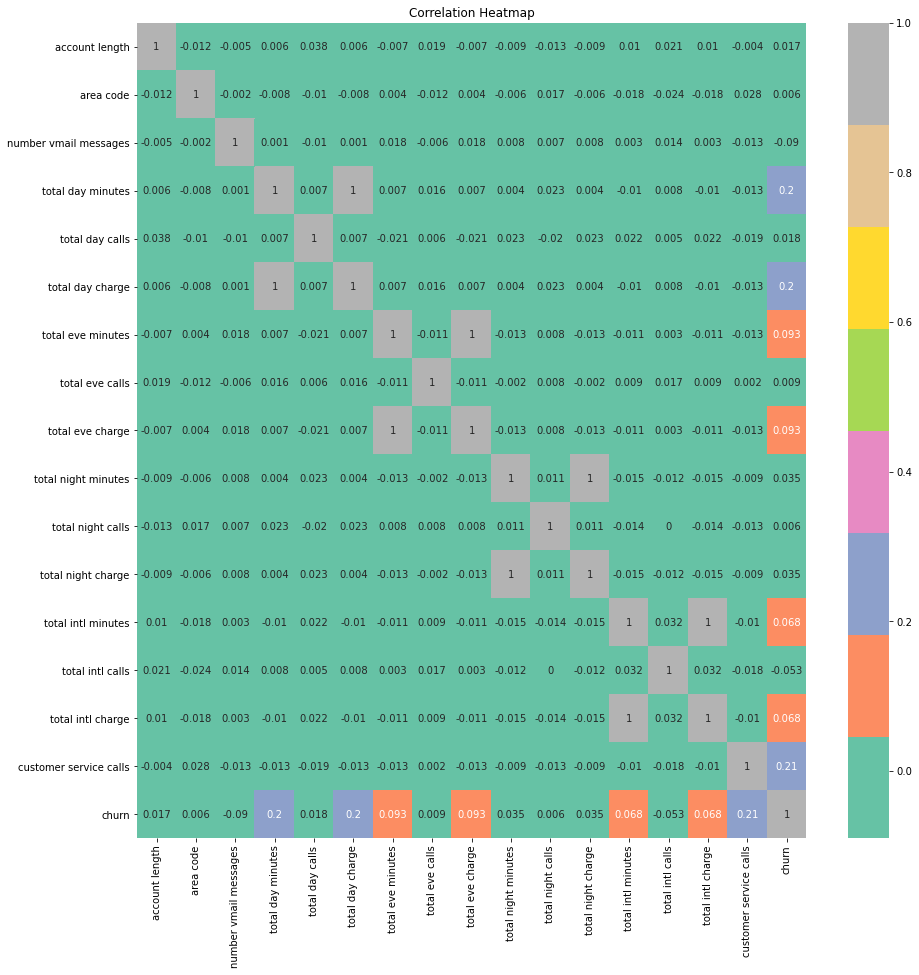

In [10]:
# collinearity check
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr.round(3), annot=True, cmap='Set2')

plt.title('Correlation Heatmap')

plt.show()


The dataset contains highly correlated columns with a correlation of 1 between the following columns:

1. Total day minutes and Total day charge 
2. Total Eve minutes and Total eve charge
3. Total Night minutes and Total Night charge
4. Total Intl minutes and Total Intl charge

From this, there is a relationship between these columns as they record similar or the same data.

I will drop the columns containing the minutes to reduce multicollinearity


In [11]:
# Dropping the highly correlated columns
highly_corr_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
df = df.drop(highly_corr_columns, axis=1)




#### 5. Detecting outliers

Outliers are data points which significantly deviate from the majority of the data.

To prevent our models being significantly influenced by outliers,  will shall be checking our dataset.

In [12]:
# Function that check for outliers
def fun_outlier_plot_box(df, column_name):
    """
    Create a box plot for a specified column of a Pandas DataFrame using Seaborn.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the column to plot.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    sns.boxplot(x=df[column_name])


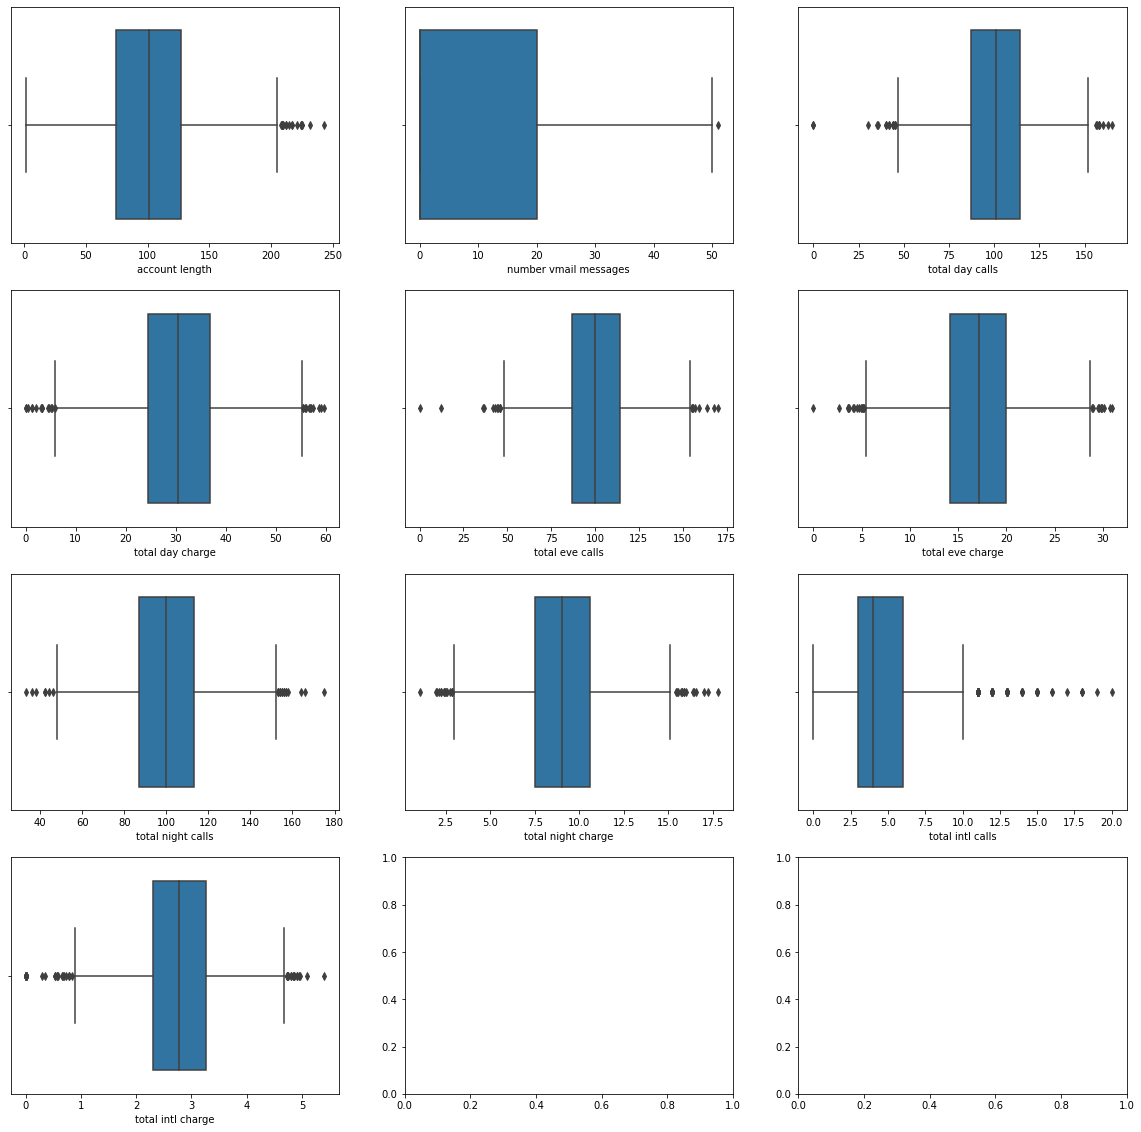

In [13]:
# List of all numerical columns
numerical_cols = ['account length','number vmail messages','total day calls','total day charge',\
                  'total eve calls','total eve charge','total night calls',\
                 'total night charge','total intl calls','total intl charge']


# Iterate through the columns of df and call create a plot that will show us the ouliers
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20,20))
for idx,column in enumerate(numerical_cols):
    i = idx // 3
    j = idx % 3
    sns.boxplot(x = column, ax=ax[i,j], data = df)

From this, there are no concerning outliers that need to be addressed as the number of vmails may represent the rule rather than the outlier.


### Data Transformation
To improve our analysis, I will be adding 2 new column from columns that share have similarities

In [14]:
#Creating a new variable called tatal charges that contains the charges charged by SyriaTel
df['total charges' ] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# Creating a new variable called total calls that contains the calls made by customers
df['total calls' ] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']

## 2.2 EXPLORATORY DATA ANALYSIS
This section will be the exploratory data analysis question where we will exploring and seeing the relationship that price has with other columns.


In [15]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
total charges             float64
total calls                 int64
dtype: object

### 2.2.1 Univariate Analysis
In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

#### Categorical Columns

The Categorical Columns in the dataset that we shall be analysing are:

- `state`
- `international plan`
- `voice mail plan`
- `churn`



In [16]:
categorical_columns = ['state', 'international plan', 'voice mail plan', 'churn']

In [17]:
def fun_plot_value_counts(df, columns, title):
    '''
    Plots the value counts of multiple columns in a dataframe as bar charts in a single figure
    and includes the value counts below each bar chart
    '''
    num_plots = len(columns)
    num_rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots // 2) + 1

    fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    fig.suptitle(title)

    for i, col in enumerate(columns):
        row = i // 2
        col_index = i % 2
        ax = axs[row, col_index]

        counts = df[col].value_counts(dropna=False)
        counts.plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax)

        ax.set_title(col)
        ax.set_xticklabels(counts.index, rotation=0)
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

        # Add value counts below the bar chart
        for j, (_, value) in enumerate(counts.iteritems()):
            ax.text(j, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

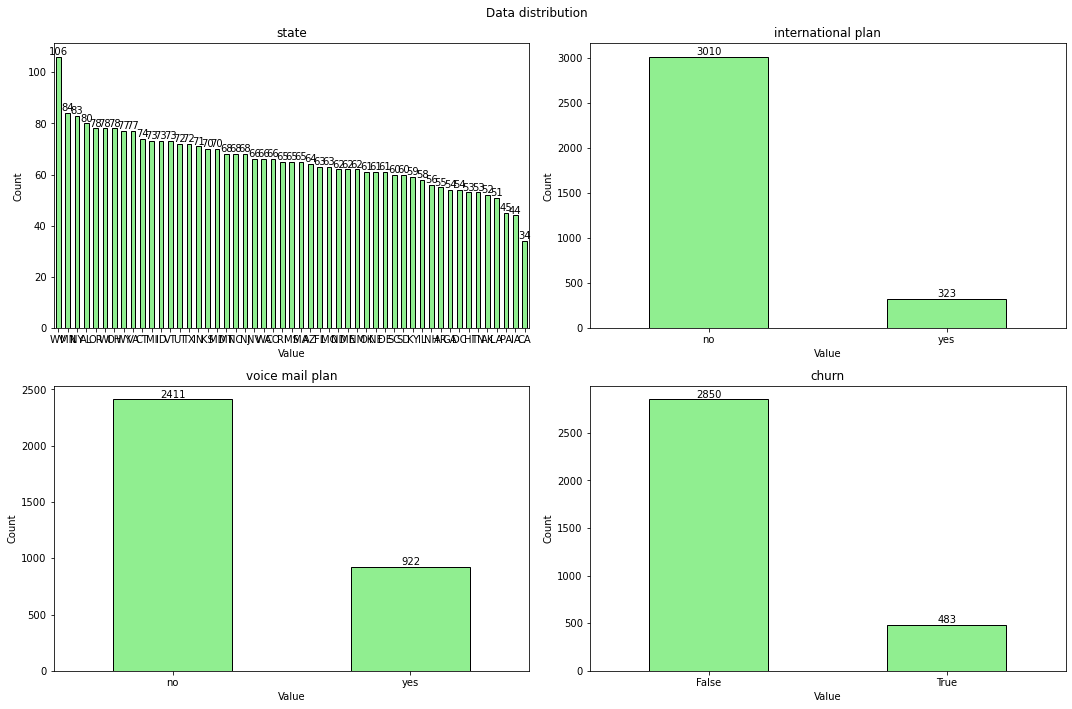

In [18]:
fun_plot_value_counts(df, categorical_columns, 'Data distribution')

###  Numerical Columns

The Numerical Columns in the dataset that we shall be analysing are:

- `account length`
- `number vmail messages`
- `total day minutes`
- `total day calls`
- `total day charge `
- `total eve charge`
- `total night calls`
- `total night charge`
- `total intl calls`
- `total intl charge`
- `customer service calls`



In [19]:
# List of all numerical columns
numerical_cols = ['account length','number vmail messages','total day calls','total day charge',\
                 'total eve calls','total eve charge','total night calls',\
                 'total night charge','total intl calls','total intl charge', 'customer service calls', 'area code']

len(numerical_cols)

12

In [20]:
def fun_describe_and_plot_distribution(df, columns, title):
    '''
    Returns the statistics of multiple columns in a dataframe and
    plots the distribution of each column as a histogram, kde, and boxplot
    '''
    for col in columns:
        # print the statistics
        print(df[col].describe())

        # create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

        # assign a graph to each ax
        sns.boxplot(df[col], ax=ax_box, color='lightgreen')
        sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins='auto', edgecolor='black')

        # set the title and layout
        plt.suptitle(f"{title} - {col} Column Data Distribution")
        plt.tight_layout()

        # show the plot
        plt.show()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64


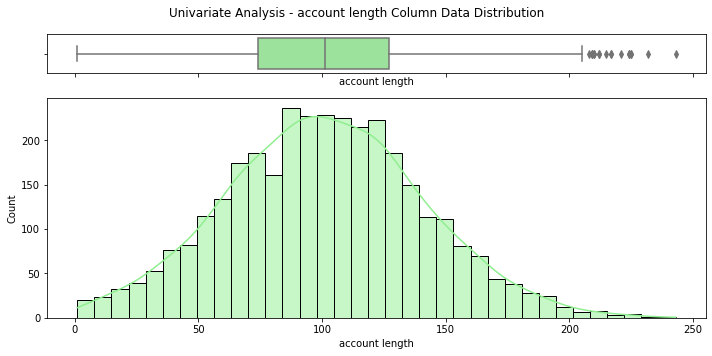

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64


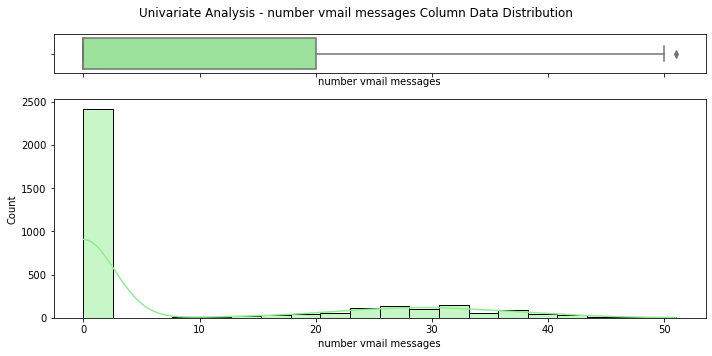

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64


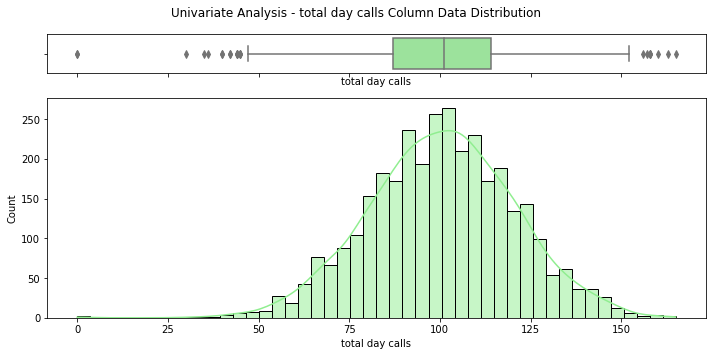

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total day charge, dtype: float64


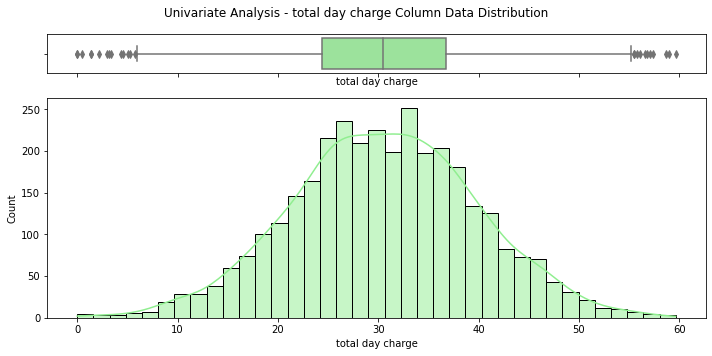

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total eve calls, dtype: float64


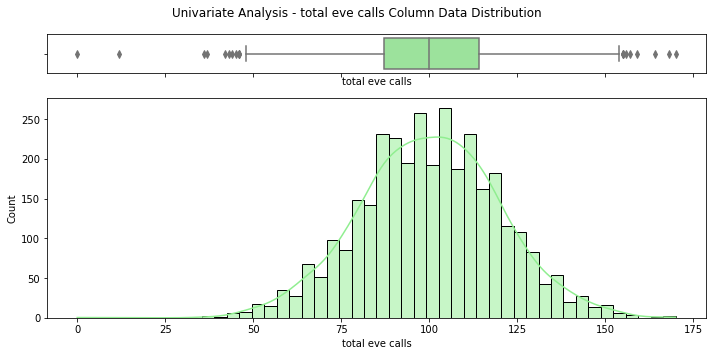

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: total eve charge, dtype: float64


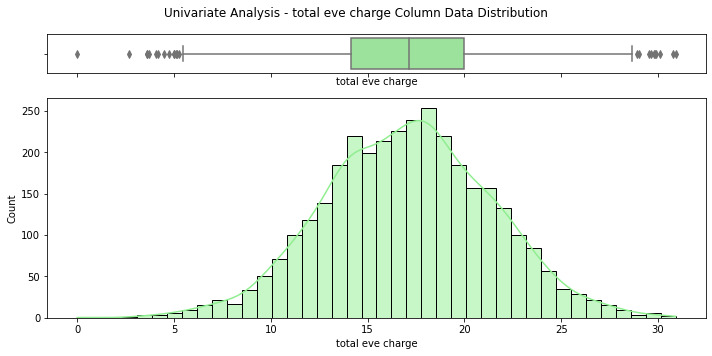

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total night calls, dtype: float64


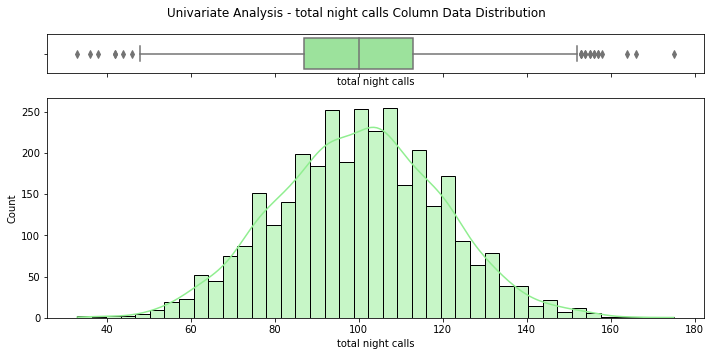

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: total night charge, dtype: float64


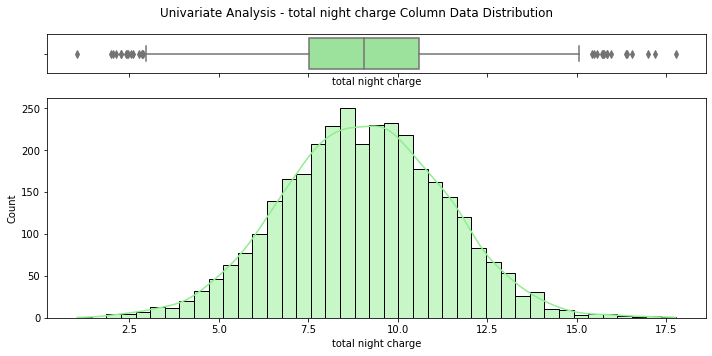

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total intl calls, dtype: float64


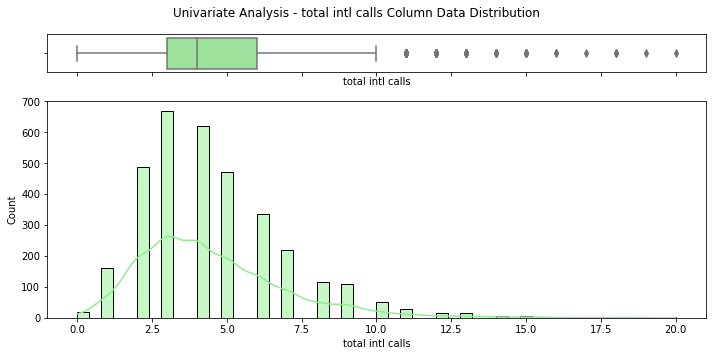

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64


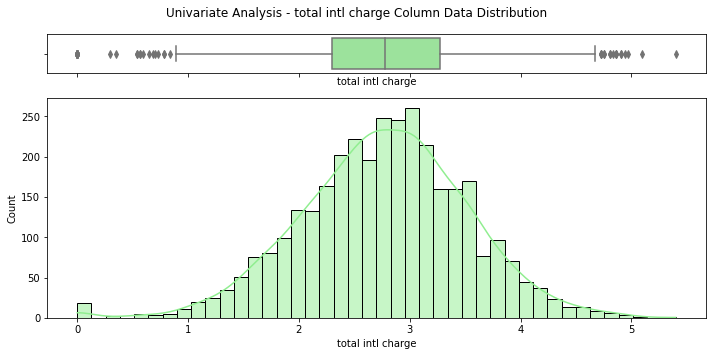

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer service calls, dtype: float64


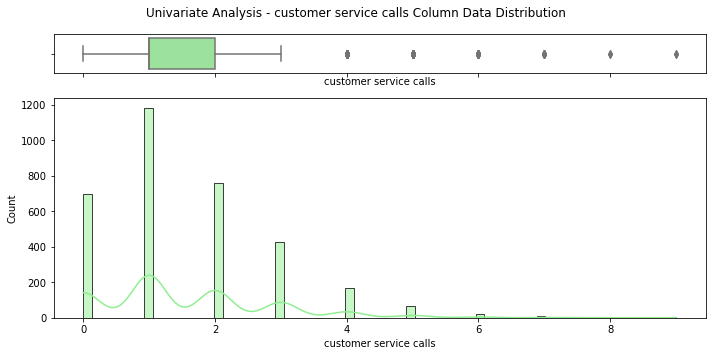

count    3333.000000
mean      437.182418
std        42.371290
min       408.000000
25%       408.000000
50%       415.000000
75%       510.000000
max       510.000000
Name: area code, dtype: float64


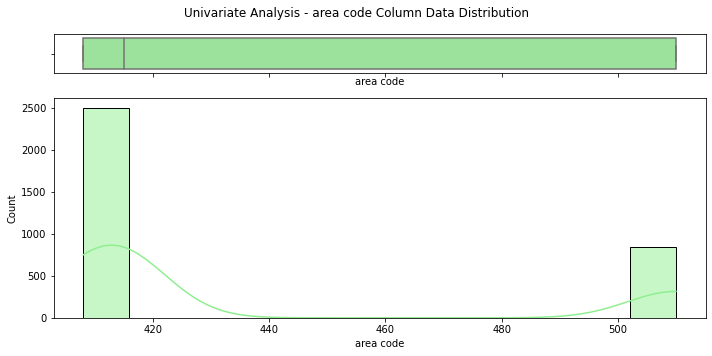

In [21]:
fun_describe_and_plot_distribution(df, numerical_cols, 'Univariate Analysis')

From the analysis above, all columns except the number of vmails messages, intl calls and customer service calls have a normal distribution.

### 2.2.2 Bi-variate Analysis
In this section, I will be exploring the relationship between the churn column and the various columns in the dataset.

In [22]:
def plot_churn_by_feature(df, feature):
    '''
    Plots customer churn by a specified feature in the dataframe
    '''

    # Group the data by the specified feature and churn, and get the count for each combination
    churn_counts = df.groupby([feature, 'churn']).size().unstack()

    # Plot the bar chart
    churn_counts.plot(kind='bar', title=f"Customer Churn by {feature}", figsize=(10, 8))
    plt.xticks(rotation=0)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Not Churned', 'Churned'])
    plt.show()

In [23]:
def plot_churn_probability(df, column):
    '''
    Plots the comparison between the probability of churn for different categories of a specified column
    '''

    plt.figure(figsize=(12, 6))
    sns.histplot(x=column, hue='churn', kde=True, stat='probability', data=df)
    plt.title(f'Comparison of Churn Probability for {column}')
    plt.show()

In [24]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'total charges',
       'total calls'],
      dtype='object')

#### 1. What is the relationship between the length of the account and those who churned

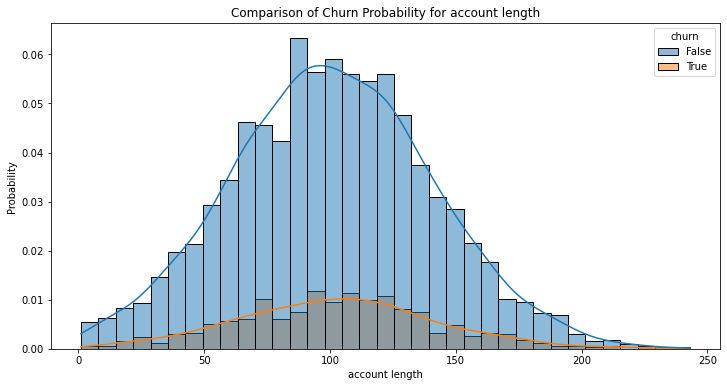

In [25]:
plot_churn_probability(df, 'account length')

The plot above shows that their is a normal distribution for both customers who churned and those who did not. This does not present us with any clear trend on whether they churn or not.

#### 2. What is the relationship between area code and customers who churn

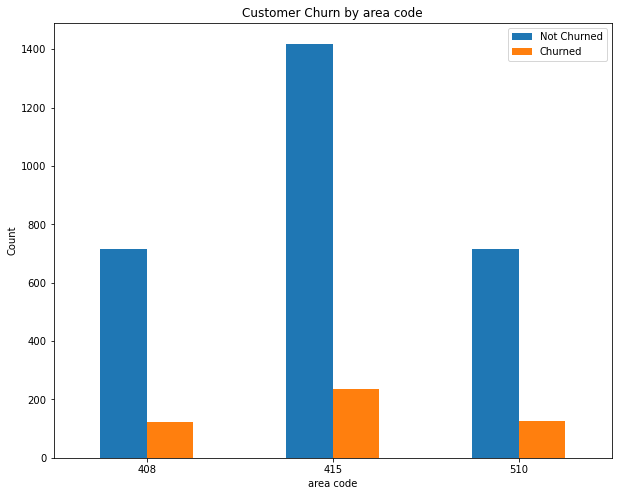

In [26]:
plot_churn_by_feature(df, 'area code')

From the above plot above, we see that area codes with a high population also have a high churn rate. That is also true for those who did not churn. 

#### 3. What is the relationship between customers with international plans and churn?

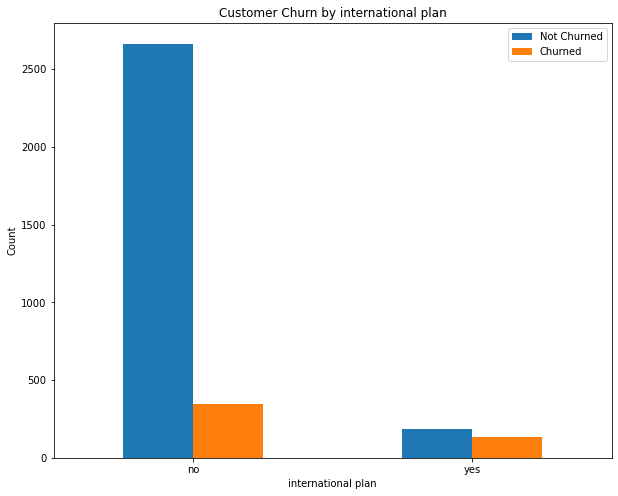

In [27]:
plot_churn_by_feature(df, 'international plan')

From the above plot above, we see that those without an international plan have the highest likelihood of churning. This may be due to the plan being essential for communication outside the country.

#### 4. What is the relationship between customers with voice mail plans and churn?

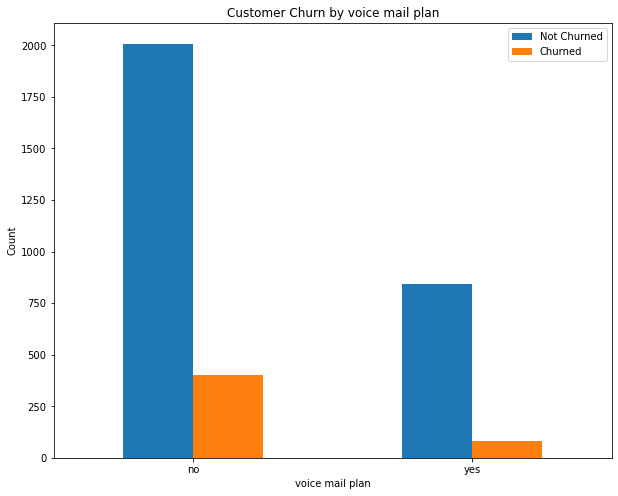

In [28]:
plot_churn_by_feature(df, 'voice mail plan')

From the plot above, we can see that customers do not a voice plan a tendency to churn that those with the plan.

#### 5. What is the relationship between the number of vmails and churn?

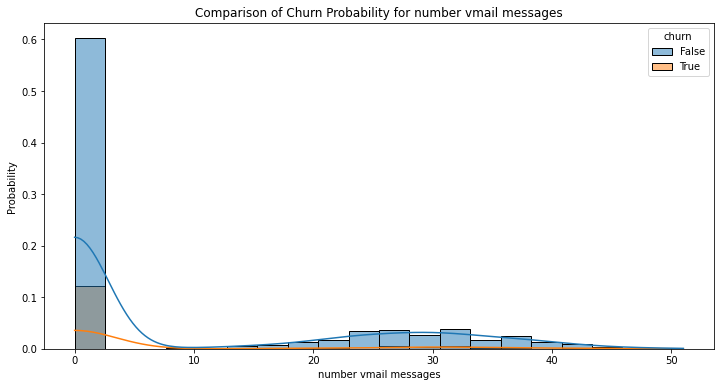

In [29]:
plot_churn_probability(df, 'number vmail messages')

From the plot above, it shows that there many customers do not make many vmail messages.The large group of customers who do not make vmail messages are also the most likely to churn.

#### 6. What is the relationship between customers making customer service calls and churn?

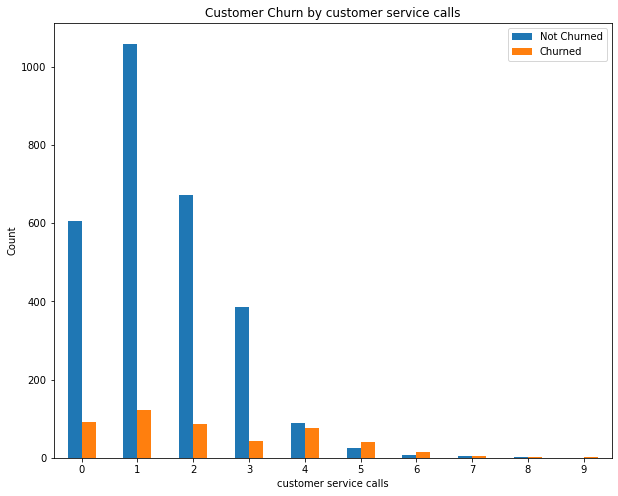

In [30]:
plot_churn_by_feature(df, 'customer service calls')

From the plot above, we see that as customers make more customer service calls, the likelihood to churn increases. This may be due to their request not being met and are unwilling to procede using the service.

In [31]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'total charges',
       'total calls'],
      dtype='object')

#### 7. What is the relationship between total calls and churn?

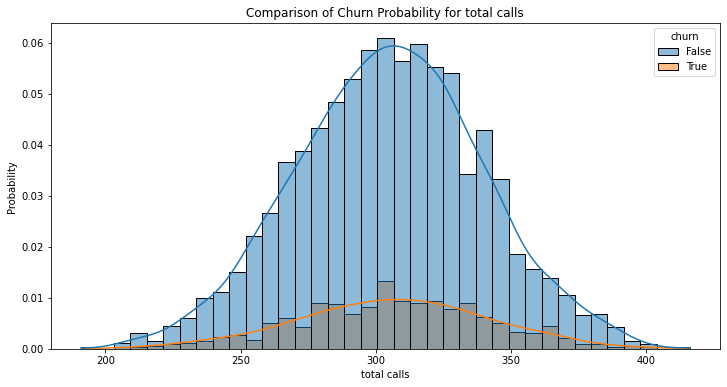

In [32]:
plot_churn_probability(df, 'total calls')

From the above plot, we see that as customers are more likely to churn if their total call count is around the 300 call mark.

#### 8. What is the relationship between total calls and churn?

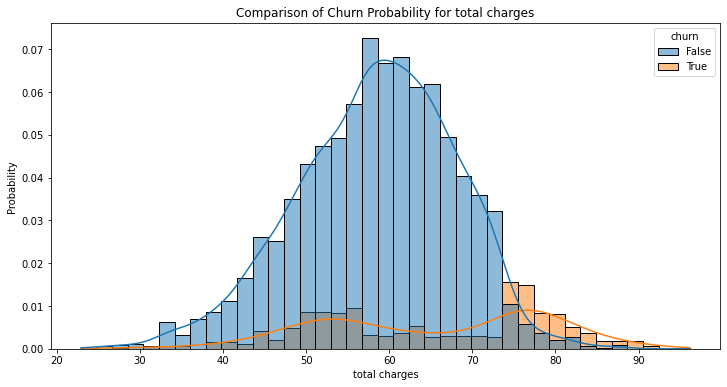

In [33]:
plot_churn_probability(df, 'total charges')

From the plot above, we see that customers are very likely to churn when the charges are beyond 75. This may due to the charges being too high and alternatives that are cheaper than SyriaTel

#### 9. What is the relationship between the various states and churn?

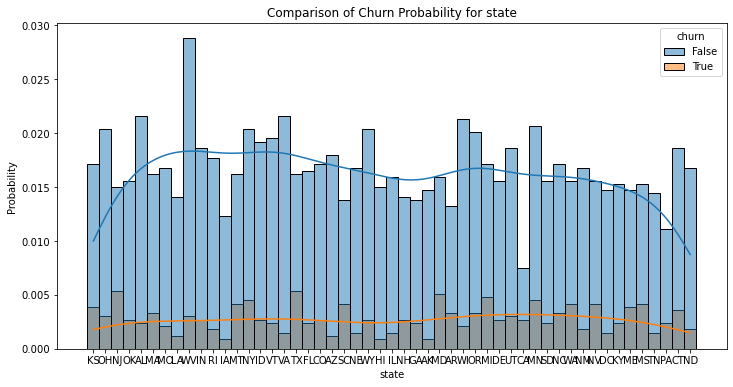

In [34]:
plot_churn_probability(df, 'state')

From the plot above, churn rate stays relatively stable throughuot the various states.

### 2.2.3 Multi-variate Analysis
In this section, I will be exploring the relationship between the various different columns in the dataset.

In [35]:
def plot_scatter_3_columns(df, x_col, y_col):
    '''
    Plots the relationship between two columns with differentiating churned and non-churned customers
    '''

    plt.figure(figsize=(12, 7), dpi=80)
    plt.scatter(df[x_col], df[y_col], df['churn'] == 0, c="blue", label='Staying Customers')
    plt.scatter(df[x_col], df[y_col], df['churn'] == 1, c="red", label='Cancelling Customers')
    plt.title(f"{x_col} vs {y_col} - Churn Comparison", fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='center')
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [36]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'total charges',
       'total calls'],
      dtype='object')

#### 1. What is the relationship between total charges, total calls and churn?

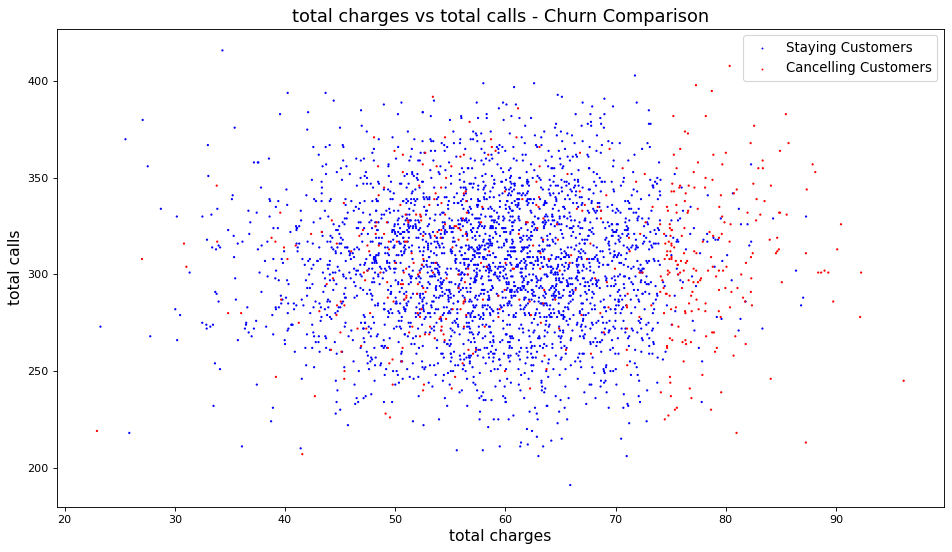

In [37]:
plot_scatter_3_columns(df, 'total charges', 'total calls')

From the plot above, we see that as total charges increase, the number of customers who churn increases. However this, even as the number of calls increase, if the charge goes beyond 74, they will churn.

#### 2. What is the relationship between total charges, customer service calls and churn?

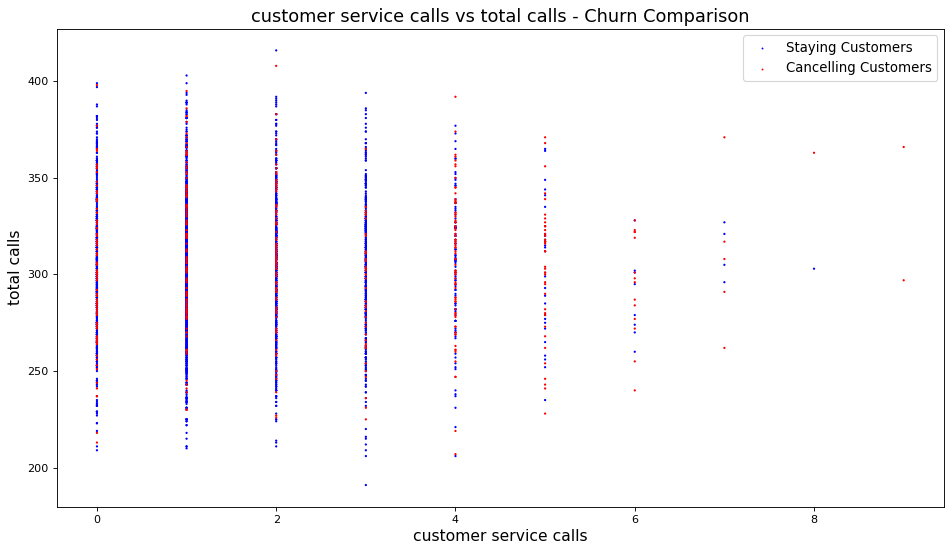

In [38]:
plot_scatter_3_columns(df, 'customer service calls', 'total calls')

From the plot above, we see that as number of calls to customer service increases, the higher the likelihood that customers will stop using the service and will eventually churn

#### 3. What is the relationship between total calls, customer service calls and churn?

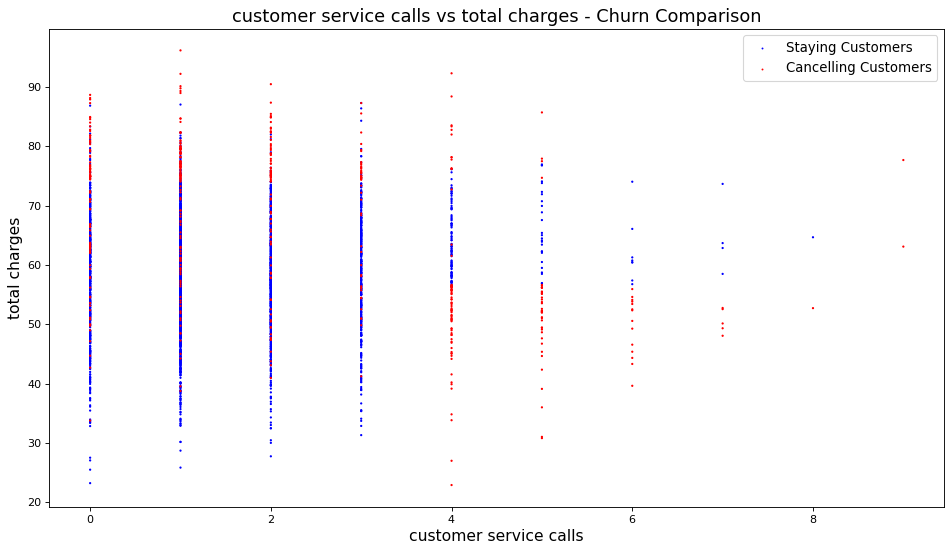

In [39]:
plot_scatter_3_columns(df, 'customer service calls', 'total charges')

From the plot above, we see that as the total charges increase, customers are likely to call customer service, else they will havechurned. By the 4th call to customer service at a total charge of approximately 60, customers are very likely to churn.

#### 4. What is the relationship between total charges, the area code and churn?

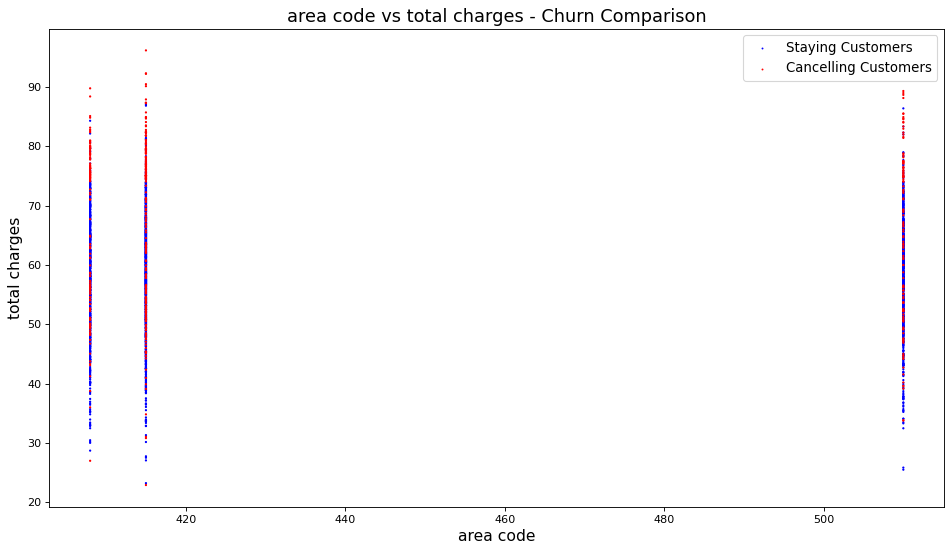

In [40]:
plot_scatter_3_columns(df, 'area code', 'total charges')

From the plot above, we see that different area codes have different tolerance for the charges they receive. This may indicate that wealthier area codes can accomodate higher charges than their poorer counterparts.

#### 5. What is the relationship between total charges, the customer's state and churn?

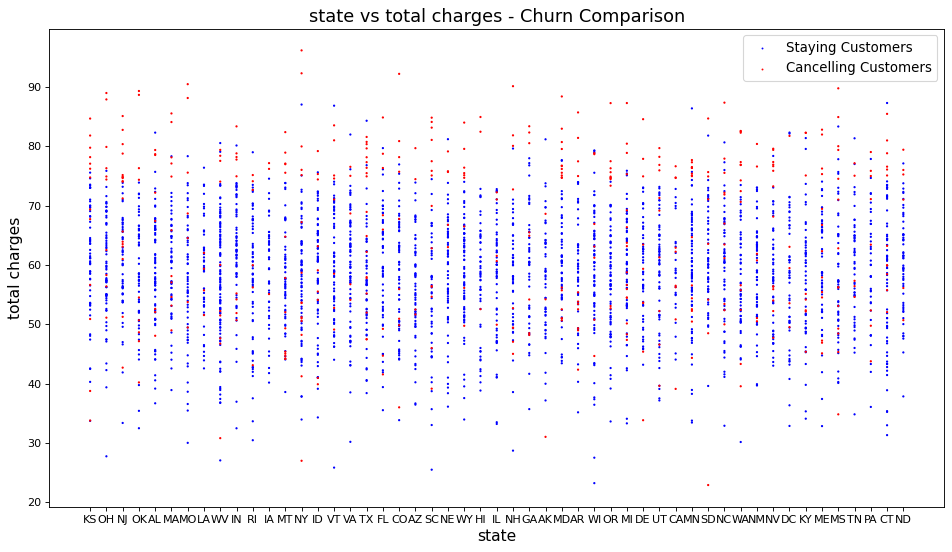

In [41]:
plot_scatter_3_columns(df, 'state', 'total charges')

From the plot we see thattheir exist states with more ore less tolerance for price with poorer states having a lower tolerance to price.

## 3.0 DATA PREPROCESSING

### 3.1 Feature Engineering
 
### Label Encoding
In our dataset, their exist column with negative and positive suggestions. Thus, I shall convert them to binary for our model to read them appropriately.


In [42]:
#  Convert columns with yes or no to binary
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total charges,total calls
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,303
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,332
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,333
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,255
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,359


In [43]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
total charges             float64
total calls                 int64
dtype: object

## One Hot Encoding
Converting the Categorical variables i.e International Plan and Voice Mail Plan to dummies

In [44]:
encoded_data = pd.get_dummies(df, columns = ['international plan', 'voice mail plan'],drop_first=True, dtype = int)
encoded_data.dtypes

state                      object
account length              int64
area code                   int64
number vmail messages       int64
total day calls             int64
total day charge          float64
total eve calls             int64
total eve charge          float64
total night calls           int64
total night charge        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
total charges             float64
total calls                 int64
international plan_1        int64
voice mail plan_1           int64
dtype: object

#### Creating a dummy variable

In [45]:
#Converting the state variable to a dummy
states_dummies = pd.get_dummies(encoded_data["state"], prefix="STATES")
encoded_data = pd.concat([encoded_data, states_dummies], axis = 1)
encoded_data.head()

,state,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,STATES_SD,STATES_TN,STATES_TX,STATES_UT,STATES_VA,STATES_VT,STATES_WA,STATES_WI,STATES_WV,STATES_WY
0,KS,128,415,25,110,45.07,99,16.78,91,11.01,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,26,123,27.47,103,16.62,103,11.45,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,0,114,41.38,110,10.30,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,0,71,50.90,88,5.26,89,8.86,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,0,113,28.34,122,12.61,121,8.41,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Dropping the state variable
encoded_data.drop('state', axis =1, inplace=True)

# 4.0 MODELLING

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

## 4.0.1 Splitting the data to X and y
Will we split the dat into X and y where y contains our churn column and X contains the remaining columns.


In [48]:
#Splitting the dataset y to have the jtarget variable and X to have the predictors
y = encoded_data['churn']
X = encoded_data.drop(['churn'], axis = 1)
X.head()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,STATES_SD,STATES_TN,STATES_TX,STATES_UT,STATES_VA,STATES_VT,STATES_WA,STATES_WI,STATES_WV,STATES_WY
0,128,415,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,0,0,0


## 4.0.2 Train Test Split of the data
#### Splitting the data into training, validation and test test.

We shall then split the data and maintain a test size of 0.25, meaning 25% of our data will be used for testing and 75% will be used for training.

The random state will be maintained at 42 to ensure that the random splitting of the data will be reproducible. 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [50]:
# preview of X_train
X_train.head()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,STATES_SD,STATES_TN,STATES_TX,STATES_UT,STATES_VA,STATES_VT,STATES_WA,STATES_WI,STATES_WV,STATES_WY
367,45,415,0,127,13.29,108,21.54,100,11.48,3,...,0,0,0,0,0,0,0,0,0,0
3103,115,415,0,111,33.30,108,19.30,113,14.09,1,...,0,0,0,0,0,0,0,0,0,0
549,121,408,31,63,40.31,117,17.48,85,8.85,5,...,0,0,0,0,0,0,0,0,0,0
2531,180,415,0,134,24.36,113,15.34,87,8.29,4,...,0,0,0,0,0,0,0,0,0,0
2378,112,510,0,122,35.05,94,13.98,101,6.31,7,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 67), (834, 67), (2499,), (834,))

## 4.0.3 Standardizing/Scaling the data
I will now standardize the data so that the features will have a mean of 0 and a standard deviation of 1, ensuring that they are on a similar scale.

In [52]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform X_train to scaled dataset and fit the model with scaled X train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame
# X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


## 4.1 Resampling Data with SMOTE

From above we can see the imbalance class, so we use SMOTEC to sythesize data for minority class. SMOTEC is for categorical features.

In [53]:
# Create instance of SMOTENC
smote = SMOTENC(categorical_features=[1, 2], random_state=123)

# Create resampled version of the train dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts())

1    2141
0    2141
Name: churn, dtype: int64


The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only. This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

## 4.2 Building the Models

To keep track of the capabilities of these models, I will append them onto the list, models. I will be using the resampled models as they have taking into account the class imbalance present in the data

In [54]:
models = []

In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_models(name, y_test, X_test, model, model_list):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    metrics['name'] = name
    
    # Append metrics to the list of models
    model_list.append(metrics)
    
    # # Create confusion matrix
    # cm = confusion_matrix(labels, preds)
    
    # # Plot confusion matrix
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    # plt.title(name + " - Confusion Matrix")
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    # plt.show()

In [56]:
def print_evaluation_scores(model, y_true, y_pred):
    # Calculate evaluation scores
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a DataFrame with the scores
    scores_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    # Print the model name
    print("Model:", type(model).__name__)
    
    # Print the DataFrame
    print(scores_df)

#### 4.2.1 Logistic Regression Baseline Model

Logistic regression can be used for customer churn prediction because it provides interpretable results and works well with binary classification problems.

It can help identify the key features or factors that contribute to customer churn.

Logistic regression can handle both numerical and categorical features commonly found in customer churn datasets.

##### Why use resampled data using SMOTE in logistic regression?
SMOTE can be useful when the dataset is imbalanced, meaning that the number of churned customers is much smaller than the number of non-churned customers.

Resampling with SMOTE helps to balance the classes by generating synthetic samples of the minority class (churned customers). This can improve the performance of logistic regression by reducing the bias towards the majority class.

In [57]:
# Define the logistic regression classifier
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Create the pipeline for the original data
pipe_original_logreg = Pipeline([
    ('logreg', logreg)
])

# Create the pipeline for the scaled data
pipe_scaled_logreg = Pipeline([
    ('scaler', scaler),
    ('logreg', logreg)
])

# Create the pipeline for the resampled data
pipe_resampled_logreg = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('logreg', logreg)
])

# Fit the pipelines on the respective training data
pipe_original_logreg.fit(X_train, y_train)
pipe_scaled_logreg.fit(X_train_scaled, y_train)
pipe_resampled_logreg.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_logreg = pipe_original_logreg.predict(X_test)
y_pred_scaled_logreg = pipe_scaled_logreg.predict(X_test_scaled)
y_pred_resampled_logreg = pipe_resampled_logreg.predict(X_test_resampled)

# Evaluate original data model
evaluate_models('Original Logistic Regression', y_test, X_test, pipe_original_logreg, models)

# Evaluate scaled data model
evaluate_models('Scaled Logistic Regression', y_test, X_test_scaled, pipe_scaled_logreg, models)

# Evaluate resampled data model
evaluate_models('Resampled Logistic Regression', y_test_resampled, X_test_resampled, pipe_resampled_logreg, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
0,0.149880,0.130344,0.074940,0.500000,Original Logistic Regression


The resampled logistic regression is the most accurate and I shall use it in tuning.

#### Tuning Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression classifier
logreg = LogisticRegression()

# Define the parameter grid for tuning
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__fit_intercept': [True, False]
}

# Create the pipeline for tuning
pipe_tuning_logreg = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('logreg', logreg)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_logreg = GridSearchCV(pipe_tuning_logreg, param_grid, cv=5)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Access the best estimator and its associated parameters
best_estimator_logreg = grid_search_logreg.best_estimator_
best_parameters_logreg = grid_search_logreg.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_logreg = best_estimator_logreg.predict(X_test_resampled)

# Evaluate tuned data model
evaluate_models('Tuned Logistic Regression', y_test_resampled, X_test_resampled, best_estimator_logreg, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
0,0.149880,0.130344,0.074940,0.500000,Original Logistic Regression


Tuning the logistic regression does not have as much impact on the model, thus I shall continue with other models

In [59]:
print_evaluation_scores(logreg, y_test, y_pred_original_logreg)

Model: LogisticRegression
      Metric     Score
0   Accuracy  0.149880
1  Precision  0.149880
2     Recall  1.000000
3   F1 Score  0.260688


#### 4.2.2 K Nearest Neighbors 

KNN can be useful in customer churn prediction when there are similar patterns among customers who churn.

It can identify customers with similar characteristics and predict churn based on their nearest neighbors' behavior.

KNN is particularly effective when there are local patterns or clusters in the dataset.

##### Why use resampled data using SMOTE in KNN?

KNN works based on the concept of proximity to nearest neighbors.

When the dataset is imbalanced, KNN may be biased towards the majority class, resulting in poor churn prediction for the minority class.

Resampling with SMOTE helps to create synthetic samples of the minority class, making it easier for KNN to identify patterns and classify churned customers more accurately.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn = KNeighborsClassifier()

# Create the pipeline for the original data
pipe_original_knn = Pipeline([
    ('knn', knn)
])

# Create the pipeline for the scaled data
pipe_scaled_knn = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

# Create the pipeline for the resampled data
pipe_resampled_knn = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('knn', knn)
])

# Fit the pipelines on the respective training data
pipe_original_knn.fit(X_train, y_train)
pipe_scaled_knn.fit(X_train_scaled, y_train)
pipe_resampled_knn.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_knn = pipe_original_knn.predict(X_test)
y_pred_scaled_knn = pipe_scaled_knn.predict(X_test_scaled)
y_pred_resampled_knn = pipe_resampled_knn.predict(X_test_resampled)

# Evaluate original data model
evaluate_models('Original KNN', y_test, X_test, pipe_original_knn, models)

# Evaluate scaled data model
evaluate_models('Scaled KNN', y_test, X_test_scaled, pipe_scaled_knn, models)

# Evaluate resampled data model
evaluate_models('Resampled KNN', y_test_resampled, X_test_resampled, pipe_resampled_knn, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
0,0.149880,0.130344,0.074940,0.500000,Original Logistic Regression
4,0.149880,0.130344,0.074940,0.500000,Original KNN


The scaled KNN is the most accurate model of KNN. However, due to class imbalance, it may cause bias in out data. Thus I shall use the resampled model for tuning.

#### Tuning the K Nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create the pipeline for tuning
pipe_tuning_knn = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('knn', knn)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_knn = GridSearchCV(pipe_tuning_knn, param_grid, cv=5)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Access the best estimator and its associated parameters
best_estimator_knn = grid_search_knn.best_estimator_
best_parameters_knn = grid_search_knn.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_knn = best_estimator_knn.predict(X_test_resampled)

# Evaluate tuned data model
evaluate_models('Tuned KNN', y_test_resampled, X_test_resampled, best_estimator_knn, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
7,0.671368,0.664698,0.686183,0.671368,Tuned KNN
0,0.149880,0.130344,0.074940,0.500000,Original Logistic Regression
4,0.149880,0.130344,0.074940,0.500000,Original KNN


Tuning the KNN too does not have much of an impact on the KNN, thus I shall move onto other models.

#### 4.2.3 Naives Bayes

Naive Bayes is a probabilistic algorithm that can be used for customer churn prediction when there is a need to estimate the probability of churn.

It is computationally efficient and performs well even with a large number of features.

Naive Bayes can handle both numerical and categorical features and is suitable for text-based churn prediction tasks.

##### Why use resampled data using SMOTE in Naives Bayes?

Naive Bayes assumes that features are independent of each other given the class label.

When the dataset is imbalanced, this assumption may not hold, and Naive Bayes may not perform well. 

Resampling with SMOTE helps to balance the classes and provide a more representative distribution of the data, improving the accuracy of Naive Bayes in predicting customer churn.

In [62]:
from sklearn.naive_bayes import GaussianNB

# Define the Naive Bayes classifier
bayes = GaussianNB()

# Create the pipeline for the original data
pipe_original_bayes = Pipeline([
    ('bayes', bayes)
])

# Create the pipeline for the scaled data
pipe_scaled_bayes = Pipeline([
    ('scaler', scaler),
    ('bayes', bayes)
])

# Create the pipeline for the resampled data
pipe_resampled_bayes = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('bayes', bayes)
])

# Fit the pipelines on the respective training data
pipe_original_bayes.fit(X_train, y_train)
pipe_scaled_bayes.fit(X_train_scaled, y_train)
pipe_resampled_bayes.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_bayes = pipe_original_bayes.predict(X_test)
y_pred_scaled_bayes = pipe_scaled_bayes.predict(X_test_scaled)
y_pred_resampled_bayes = pipe_resampled_bayes.predict(X_test_scaled)

# Evaluate original data model
evaluate_models('Original Naive Bayes', y_test, X_test, pipe_original_bayes, models)

# Evaluate scaled data model
evaluate_models('Scaled Naive Bayes', y_test, X_test_scaled, pipe_scaled_bayes, models)

# Evaluate resampled data model
evaluate_models('Resampled Naive Bayes', y_test_resampled, X_test_resampled, pipe_resampled_bayes, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
7,0.671368,0.664698,0.686183,0.671368,Tuned KNN
10,0.650212,0.648533,0.653137,0.650212,Resampled Naive Bayes
9,0.579137,0.494655,0.538527,0.574550,Scaled Naive Bayes
0,0.149880,0.130344,0.074940,0.500000,Original Logistic Regression


The original Naive Bayes has a strong accuracy score, but is plagued with being imbalance and not being scaled.

#### Tuning the Bayes Naives

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes classifier
bayes = GaussianNB()

# Define the parameter grid for tuning
param_grid = {}

# Create the pipeline for tuning
pipe_tuning_bayes = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('bayes', bayes)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_bayes = GridSearchCV(pipe_tuning_bayes, param_grid, cv=5)
grid_search_bayes.fit(X_train_resampled, y_train_resampled)

# Access the best estimator and its associated parameters
best_estimator_bayes = grid_search_bayes.best_estimator_
best_parameters_bayes = grid_search_bayes.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_bayes = best_estimator_bayes.predict(X_test_resampled)

# Evaluate tuned data model
evaluate_models('Tuned Naive Bayes', y_test_resampled, X_test_resampled, best_estimator_bayes, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
7,0.671368,0.664698,0.686183,0.671368,Tuned KNN
10,0.650212,0.648533,0.653137,0.650212,Resampled Naive Bayes
11,0.650212,0.648533,0.653137,0.650212,Tuned Naive Bayes
9,0.579137,0.494655,0.538527,0.574550,Scaled Naive Bayes


Tuning it also has little effect on the model.

#### 4.2.4 Decision Tree

Decision trees can capture complex relationships between customer attributes and churn.

They are effective at identifying important features and generating interpretable rules for churn prediction.

Decision trees can handle both numerical and categorical features and provide insights into the decision-making process.

##### Why use resampled data using SMOTE in Decision Trees?

Decision trees are less sensitive to imbalanced datasets compared to some other algorithms.

However, when the dataset is highly imbalanced, decision trees may still struggle to learn patterns related to the minority class. 

Resampling with SMOTE can address this issue by creating synthetic samples of the minority class, allowing decision trees to capture more accurate representations of churn patterns.

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
dec_tree = DecisionTreeClassifier()

# Create the pipeline for the original data
pipe_original_dec_tree = Pipeline([
    ('dec_tree', dec_tree)
])

# Create the pipeline for the scaled data
pipe_scaled_dec_tree = Pipeline([
    ('scaler', scaler),
    ('dec_tree', dec_tree)
])

# Create the pipeline for the resampled data
pipe_resampled_dec_tree = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('dec_tree', dec_tree)
])

# Fit the pipelines on the respective training data
pipe_original_dec_tree.fit(X_train, y_train)
pipe_scaled_dec_tree.fit(X_train_scaled, y_train)
pipe_resampled_dec_tree.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_dec_tree = pipe_original_dec_tree.predict(X_test)
y_pred_scaled_dec_tree = pipe_scaled_dec_tree.predict(X_test_scaled)
y_pred_resampled_dec_tree = pipe_resampled_dec_tree.predict(X_test_scaled)

# Evaluate original data model
evaluate_models('Original Decision Tree', y_test, X_test, pipe_original_dec_tree, models)

# Evaluate scaled data model
evaluate_models('Scaled Decision Tree', y_test, X_test_scaled, pipe_scaled_dec_tree, models)

# Evaluate resampled data model
evaluate_models('Resampled Decision Tree', y_test_resampled, X_test_resampled, pipe_resampled_dec_tree, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
7,0.671368,0.664698,0.686183,0.671368,Tuned KNN
10,0.650212,0.648533,0.653137,0.650212,Resampled Naive Bayes


The resampled decision tree has the highest accuracy score, so I will tune it .

#### Tuning the decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree classifier
dec_tree = DecisionTreeClassifier()

# Define the parameter grid for tuning
param_grid = {
    'dec_tree__criterion': ['gini', 'entropy'],
    'dec_tree__max_depth': [None, 5, 10, 15],
    'dec_tree__min_samples_split': [2, 5, 10],
    'dec_tree__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline for tuning
pipe_tuning_dec_tree = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('dec_tree', dec_tree)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_dec_tree = GridSearchCV(pipe_tuning_dec_tree, param_grid, cv=5)
grid_search_dec_tree.fit(X_train_resampled, y_train_resampled)

# Access the best estimator and its associated parameters
best_estimator_dec_tree = grid_search_dec_tree.best_estimator_
best_parameters_dec_tree = grid_search_dec_tree.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_dec_tree = best_estimator_dec_tree.predict(X_test_resampled)

# Evaluate tuned data model
evaluate_models('Tuned Decision Tree', y_test_resampled, X_test_resampled, best_estimator_dec_tree, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
15,0.931594,0.931590,0.931698,0.931594,Tuned Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN
6,0.684767,0.682218,0.690892,0.684767,Resampled KNN
7,0.671368,0.664698,0.686183,0.671368,Tuned KNN


Having tuned it, the resampled decision tree is still better than the tuned version.

#### 4.2.5 Bagged Trees

Bagged trees, such as Random Forest, can improve churn prediction by combining multiple decision trees.

Ensemble methods reduce overfitting and increase model performance by averaging predictions from multiple models.

Bagged trees can handle both numerical and categorical features and provide feature importance rankings.

##### Why use resampled data using SMOTE in Bagged Trees?

Bagged tree algorithms, such as Random Forest, are known for their ability to handle imbalanced datasets. 

However, in cases of severe class imbalance, the performance of bagged trees may still be affected. 

Resampling with SMOTE can help to alleviate the imbalance and improve the performance of bagged trees by providing a more balanced training set.

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base Decision Tree classifier
dec_tree = DecisionTreeClassifier()

# Define the Bagged Trees classifier
bag_tree = BaggingClassifier(base_estimator=dec_tree)

# Create the pipeline for the original data
pipe_original_bag_tree = Pipeline([
    ('bag_tree', bag_tree)
])

# Create the pipeline for the scaled data
pipe_scaled_bag_tree = Pipeline([
    ('scaler', scaler),
    ('bag_tree', bag_tree)
])

# Create the pipeline for the resampled data
pipe_resampled_bag_tree = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('bag_tree', bag_tree)
])

# Fit the pipelines on the respective training data
pipe_original_bag_tree.fit(X_train, y_train)
pipe_scaled_bag_tree.fit(X_train_scaled, y_train)
pipe_resampled_bag_tree.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_bag_tree = pipe_original_bag_tree.predict(X_test)
y_pred_scaled_bag_tree = pipe_scaled_bag_tree.predict(X_test_scaled)
y_pred_resampled_bag_tree = pipe_resampled_bag_tree.predict(X_test_scaled)

# Evaluate original data model
evaluate_models('Original Bagged Trees', y_test, X_test, pipe_original_bag_tree, models)

# Evaluate scaled data model
evaluate_models('Scaled Bagged Trees', y_test, X_test_scaled, pipe_scaled_bag_tree, models)

# Evaluate resampled data model
evaluate_models('Resampled Bagged Trees', y_test_resampled, X_test_resampled, pipe_resampled_bag_tree, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
17,0.967626,0.935411,0.942962,0.928243,Scaled Bagged Trees
18,0.950635,0.950578,0.952710,0.950635,Resampled Bagged Trees
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
15,0.931594,0.931590,0.931698,0.931594,Tuned Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes
5,0.738609,0.607514,0.599801,0.655165,Scaled KNN


Seeing how well the decision tree performed, bagging it seemed to have improved it significantly.

#### Tuning bagged Tree

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the base Decision Tree classifier
base_tree = DecisionTreeClassifier()

# Define the Bagged Tree classifier
bagged_tree = BaggingClassifier(base_estimator=base_tree)

# Define the parameter grid for tuning
param_grid = {
    'bag_tree__n_estimators': [50, 100],
    'bag_tree__max_samples': [0.8, 1.0],
    'bag_tree__max_features': [0.8, 1.0]
}

# Create the pipeline for tuning
pipe_tuning_bagged_tree = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('bag_tree', bagged_tree)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_bagged_tree = GridSearchCV(pipe_tuning_bagged_tree, param_grid, cv=5)
grid_search_bagged_tree.fit(X_train_resampled, y_train_resampled)

# Access the best estimator and its associated parameters
best_estimator_bagged_tree = grid_search_bagged_tree.best_estimator_
best_parameters_bagged_tree = grid_search_bagged_tree.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_bagged_tree = best_estimator_bagged_tree.predict(X_test_resampled)

# Evaluate tuned data model
evaluate_models('Tuned Bagged Tree', y_test_resampled, X_test_resampled, best_estimator_bagged_tree, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
19,0.974612,0.974598,0.975706,0.974612,Tuned Bagged Tree
17,0.967626,0.935411,0.942962,0.928243,Scaled Bagged Trees
18,0.950635,0.950578,0.952710,0.950635,Resampled Bagged Trees
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
15,0.931594,0.931590,0.931698,0.931594,Tuned Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression
8,0.770983,0.516604,0.518743,0.516056,Original Naive Bayes


Tuning the bagged tree results in the best performing model thus far.

#### 4.2.6 Random Forest

Random Forest is a powerful ensemble learning algorithm that combines multiple decision trees to improve churn prediction accuracy.

It can handle a large number of features and automatically select the most informative ones.

Random Forest is robust to outliers and noise in the data and can handle imbalanced datasets commonly encountered in churn prediction.

##### Why use resampled data using SMOTE in Random Forest?

Similar to bagged trees, Random Forest is generally robust to imbalanced datasets. 

However, in cases of extreme class imbalance, the minority class may be underrepresented, leading to lower prediction accuracy for customer churn. 

Resampling with SMOTE can enhance the performance of Random Forest by increasing the representation of the minority class and capturing its patterns more effectively.

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define the base Random Forest classifier
rand_forest = RandomForestClassifier()

# Create the pipeline for the original data
pipe_original_rand_forest = Pipeline([
    ('rand_forest', rand_forest)
])

# Create the pipeline for the scaled data
pipe_scaled_rand_forest = Pipeline([
    ('scaler', scaler),
    ('rand_forest', rand_forest)
])

# # Create the pipeline for the resampled data
# pipe_resampled_rand_forest = Pipeline([
#     ('scaler', scaler),
#     ('smote', smote),
#     ('rand_forest', rand_forest)
# ])

# Fit the pipelines on the respective training data
pipe_original_rand_forest.fit(X_train, y_train)
pipe_scaled_rand_forest.fit(X_train_scaled, y_train)
# pipe_resampled_rand_forest.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test data using each model
y_pred_original_rand_forest = pipe_original_rand_forest.predict(X_test)
y_pred_scaled_rand_forest = pipe_scaled_rand_forest.predict(X_test_scaled)
# y_pred_resampled_rand_forest = pipe_resampled_rand_forest.predict(X_test_scaled)

# Evaluate original data model
evaluate_models('Original Random Forest', y_test, X_test, pipe_original_rand_forest, models)

# Evaluate scaled data model
evaluate_models('Scaled Random Forest', y_test, X_test_scaled, pipe_scaled_rand_forest, models)

# Evaluate resampled data model
# evaluate_models('Resampled Random Forest', y_test_resampled, X_test_resampled, pipe_resampled_rand_forest, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
19,0.974612,0.974598,0.975706,0.974612,Tuned Bagged Tree
21,0.968825,0.932962,0.982313,0.896000,Scaled Random Forest
17,0.967626,0.935411,0.942962,0.928243,Scaled Bagged Trees
18,0.950635,0.950578,0.952710,0.950635,Resampled Bagged Trees
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
15,0.931594,0.931590,0.931698,0.931594,Tuned Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression
1,0.780576,0.675225,0.657201,0.749038,Scaled Logistic Regression


The scaled random forest now is the best performing model, thus, I tune it.

#### Tuning Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the base Random Forest classifier
base_forest = RandomForestClassifier()

# Define the parameter grid for tuning
param_grid = {
    'rand_forest__n_estimators': [50, 100],
    'rand_forest__max_depth': [None, 5, 10],
    'rand_forest__min_samples_split': [2, 5],
    'rand_forest__min_samples_leaf': [1, 2],
    'rand_forest__max_features': ['auto', 'sqrt']
}

# Create the pipeline for tuning
pipe_tuning_rand_forest = Pipeline([
    ('scaler', scaler),
    # ('smote', smote),
    ('rand_forest', base_forest)
])

# Perform grid search with cross-validation on the specified parameter grid
grid_search_rand_forest = GridSearchCV(pipe_tuning_rand_forest, param_grid, cv=5)
grid_search_rand_forest.fit(X_train_scaled, y_train)

# Access the best estimator and its associated parameters
best_estimator_rand_forest = grid_search_rand_forest.best_estimator_
best_parameters_rand_forest = grid_search_rand_forest.best_params_

# Predict the target variable for the test data using the tuned model
y_pred_tuned_rand_forest = best_estimator_rand_forest.predict(X_test_scaled)

# Evaluate tuned data model
evaluate_models('Tuned Random Forest(scaled)', y_test, X_test_scaled, best_estimator_rand_forest, models)

models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
19,0.974612,0.974598,0.975706,0.974612,Tuned Bagged Tree
21,0.968825,0.932962,0.982313,0.896000,Scaled Random Forest
17,0.967626,0.935411,0.942962,0.928243,Scaled Bagged Trees
22,0.964029,0.921459,0.979702,0.880000,Tuned Random Forest(scaled)
18,0.950635,0.950578,0.952710,0.950635,Resampled Bagged Trees
14,0.933004,0.933002,0.933074,0.933004,Resampled Decision Tree
15,0.931594,0.931590,0.931698,0.931594,Tuned Decision Tree
13,0.930456,0.874820,0.848464,0.909676,Scaled Decision Tree
2,0.816643,0.816550,0.817290,0.816643,Resampled Logistic Regression
3,0.815233,0.815229,0.815255,0.815233,Tuned Logistic Regression


While not as good as the scaled model, the tuned random forest is still powerful.


## Evaluation of the models

In [70]:
models_df = pd.DataFrame(models)

##### 1. **Accuracy:** 

Accuracy represents the proportion of correctly classified instances out of the total number of instances. Higher accuracy values indicate better performance.
 
In this case, the scaled random forest, the tuned random forest and the tunned bagged tree achieve the highest accuracy scores of above 0.97, indicating that they have the highest overall classification accuracy among the models.

In [71]:
best_accuracy = models_df.sort_values(by='accuracy', ascending=False).head(10)
print(best_accuracy)

    accuracy        f1  precision    recall                           name
19  0.974612  0.974598   0.975706  0.974612              Tuned Bagged Tree
21  0.968825  0.932962   0.982313  0.896000           Scaled Random Forest
17  0.967626  0.935411   0.942962  0.928243            Scaled Bagged Trees
22  0.964029  0.921459   0.979702  0.880000    Tuned Random Forest(scaled)
18  0.950635  0.950578   0.952710  0.950635         Resampled Bagged Trees
14  0.933004  0.933002   0.933074  0.933004        Resampled Decision Tree
15  0.931594  0.931590   0.931698  0.931594            Tuned Decision Tree
13  0.930456  0.874820   0.848464  0.909676           Scaled Decision Tree
2   0.816643  0.816550   0.817290  0.816643  Resampled Logistic Regression
3   0.815233  0.815229   0.815255  0.815233      Tuned Logistic Regression


##### 2. **F1-Score:** 

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision (ability to correctly identify positive instances) and recall (ability to correctly identify all positive instances). Similar to accuracy, higher F1-scores indicate better performance. 

In this case, the tuned bagged tree, the resampled bagged tree and the scaled random forest achieve the highest f1 scores of above 0.94, indicating that they have the highest overall classification f1 among the models.

In [72]:
best_f1 = models_df.sort_values(by='f1', ascending=False).head(10)
print(best_f1)

    accuracy        f1  precision    recall                           name
19  0.974612  0.974598   0.975706  0.974612              Tuned Bagged Tree
18  0.950635  0.950578   0.952710  0.950635         Resampled Bagged Trees
17  0.967626  0.935411   0.942962  0.928243            Scaled Bagged Trees
14  0.933004  0.933002   0.933074  0.933004        Resampled Decision Tree
21  0.968825  0.932962   0.982313  0.896000           Scaled Random Forest
15  0.931594  0.931590   0.931698  0.931594            Tuned Decision Tree
22  0.964029  0.921459   0.979702  0.880000    Tuned Random Forest(scaled)
13  0.930456  0.874820   0.848464  0.909676           Scaled Decision Tree
2   0.816643  0.816550   0.817290  0.816643  Resampled Logistic Regression
3   0.815233  0.815229   0.815255  0.815233      Tuned Logistic Regression


##### 3. **Precision:** 

Precision represents the proportion of true positive predictions out of all positive predictions. It measures the model's ability to avoid false positives. Higher precision values indicate fewer false positives. 

In this case, the scaled random forest, the tuned random forest and tuned bagged tree have the highest precision scores, above 0.97.

In [73]:
best_precision = models_df.sort_values(by='precision', ascending=False).head(10)
print(best_precision)

    accuracy        f1  precision    recall                           name
21  0.968825  0.932962   0.982313  0.896000           Scaled Random Forest
22  0.964029  0.921459   0.979702  0.880000    Tuned Random Forest(scaled)
19  0.974612  0.974598   0.975706  0.974612              Tuned Bagged Tree
18  0.950635  0.950578   0.952710  0.950635         Resampled Bagged Trees
17  0.967626  0.935411   0.942962  0.928243            Scaled Bagged Trees
14  0.933004  0.933002   0.933074  0.933004        Resampled Decision Tree
15  0.931594  0.931590   0.931698  0.931594            Tuned Decision Tree
13  0.930456  0.874820   0.848464  0.909676           Scaled Decision Tree
2   0.816643  0.816550   0.817290  0.816643  Resampled Logistic Regression
3   0.815233  0.815229   0.815255  0.815233      Tuned Logistic Regression


##### 4. **Recall:**

Recall (also known as sensitivity or true positive rate) represents the proportion of true positive predictions out of all actual positive instances. It measures the model's ability to identify positive instances correctly. Higher recall values indicate fewer false negatives.

Tuned bagged tree, resampled bagged tree and resampled decision tree achieve the highest recall scores, above 0.93.

In [74]:
best_recall = models_df.sort_values(by='recall', ascending=False).head(10)
print(best_recall)

    accuracy        f1  precision    recall                           name
19  0.974612  0.974598   0.975706  0.974612              Tuned Bagged Tree
18  0.950635  0.950578   0.952710  0.950635         Resampled Bagged Trees
14  0.933004  0.933002   0.933074  0.933004        Resampled Decision Tree
15  0.931594  0.931590   0.931698  0.931594            Tuned Decision Tree
17  0.967626  0.935411   0.942962  0.928243            Scaled Bagged Trees
13  0.930456  0.874820   0.848464  0.909676           Scaled Decision Tree
21  0.968825  0.932962   0.982313  0.896000           Scaled Random Forest
22  0.964029  0.921459   0.979702  0.880000    Tuned Random Forest(scaled)
2   0.816643  0.816550   0.817290  0.816643  Resampled Logistic Regression
3   0.815233  0.815229   0.815255  0.815233      Tuned Logistic Regression


### Choosing the model
In conclusion, the Tuned Bagged Tree stands out as a top-performing model across multiple evaluation metrics, including F1-score, precision, and recall. It demonstrates a good balance between precision and recall, effectively avoids false positives, and correctly identifies positive instances. The Scaled Random Forest and Tuned Random Forest also perform well, achieving high accuracy, precision, and recall scores.

Thus my model of choiced is the ***Tuned Bagged Tree*** model as it is the best performing of all models I have created.

## Recommendations

1. The company should closely analyze the performance of states with low performance and determine if the issue lies in network coverage. If network coverage is found to be inadequate, we will develop a strategy to improve coverage by deploying additional boosters in those states.

2. SyriaTel's focus should be on investigating whether a more attractive international calling plan can encourage customers to consider its international plan while they are traveling.

3. SyriaTel should explore the possibility of engaging with different vendors or establishing temporary partnerships to provide incentives and promotions aimed at increasing customer satisfaction and reducing churn among dissatisfied customers.
